<a href="https://colab.research.google.com/github/RochX/comp486-assignments/blob/main/assignment5/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5
Xavier Silva

## Part 1

### Setting Up The Data
Download the training and test data.
Load data into csv files.

In [11]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

# download and extract data
tarball_path = "sign_mnist.tgz"
if not Path(tarball_path).is_file():
  url = "https://github.com/RochX/comp486-assignments/raw/main/assignment5/sign_mnist.tgz"
  urllib.request.urlretrieve(url, tarball_path)
  with tarfile.open(tarball_path) as tarball:
    tarball.extractall()

sign_mnist_train = pd.read_csv("sign_mnist_train.csv", header=None).rename({0: "Letter"}, axis=1)
sign_mnist_test = pd.read_csv("sign_mnist_test.csv", header=None).rename({0: "Letter"}, axis=1)

Shuffle the data.

In [12]:
from sklearn.utils import shuffle
sign_mnist_train = shuffle(sign_mnist_train, random_state=42)
sign_mnist_test = shuffle(sign_mnist_test, random_state=42)

Relabel the letter column.

In [13]:
def rename_letter_col(df):
  # letter_dict = {0: 'A', 1: 'B', ...}
  # letter_dict = {i:chr(i+65) for i in range(0,26)}
  df = df.rename({0: "Letter"}, axis=1)
  df.columns = df.columns.astype(str)
  # df["Letter"] = df["Letter"].replace(letter_dict)
  return df

sign_mnist_train = rename_letter_col(sign_mnist_train)
sign_mnist_test = rename_letter_col(sign_mnist_test)

Discover the data.

In [14]:
sign_mnist_train.head()

,Letter,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
16203,24,118,122,126,129,134,139,143,147,150,...,103,104,103,102,100,99,99,99,97,96
23292,8,173,173,174,174,175,176,176,177,177,...,146,139,127,100,177,232,220,223,223,221
7204,18,83,88,94,100,108,115,121,127,132,...,81,66,137,182,181,184,186,186,187,188
22591,2,167,169,168,167,167,169,169,169,169,...,223,223,222,221,220,220,218,217,218,193
3498,24,120,124,128,132,137,141,144,148,150,...,68,44,84,93,96,96,82,126,144,103


In [15]:
sign_mnist_train.describe()

,Letter,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


Hold out the last 4,000 images from training set for validation.

In [16]:
num_for_validation = 4000
sign_mnist_train = sign_mnist_train[:-num_for_validation]
sign_mnist_validation = sign_mnist_train.iloc[-num_for_validation:]
sign_mnist_validation

,Letter,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
21246,2,182,182,181,182,183,183,182,183,184,...,229,228,227,227,227,225,224,225,222,220
18366,19,176,180,182,182,182,184,186,186,186,...,207,207,205,203,205,204,202,201,200,200
12658,0,158,160,161,163,165,168,169,170,170,...,79,168,217,211,212,212,212,211,211,212
8391,3,99,103,105,115,127,136,144,149,151,...,139,128,120,120,119,119,117,111,202,235
24069,20,79,84,100,118,130,134,142,151,156,...,77,10,12,45,37,17,11,32,29,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046,13,108,113,116,119,122,124,125,128,130,...,63,77,161,160,161,159,159,158,157,157
9227,10,183,185,186,186,186,186,187,186,185,...,85,165,244,229,229,228,200,129,75,63
5585,8,152,152,152,151,152,151,150,148,148,...,167,164,164,165,162,160,160,159,158,156
23303,20,144,146,149,151,153,154,155,156,157,...,179,178,178,177,176,175,173,172,170,168


Scale the pixel data and split into features and labels.

In [17]:
from sklearn.preprocessing import MinMaxScaler

def split_into_features_labels(df, *, label):
  features = df.drop(label, axis=1)
  labels = df[[label]]
  return features, labels

# split into features and labels
sign_mnist_train_features, sign_mnist_train_labels = split_into_features_labels(sign_mnist_train, label="Letter")
sign_mnist_validate_features, sign_mnist_validate_labels = split_into_features_labels(sign_mnist_validation, label="Letter")
sign_mnist_test_features, sign_mnist_test_labels = split_into_features_labels(sign_mnist_test, label="Letter")

# scale pixel data
sign_mnist_train_features = sign_mnist_train_features / 255
sign_mnist_validate_features = sign_mnist_validate_features / 255
sign_mnist_test_features = sign_mnist_test_features / 255

In [18]:
sign_mnist_train

,Letter,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
16203,24,118,122,126,129,134,139,143,147,150,...,103,104,103,102,100,99,99,99,97,96
23292,8,173,173,174,174,175,176,176,177,177,...,146,139,127,100,177,232,220,223,223,221
7204,18,83,88,94,100,108,115,121,127,132,...,81,66,137,182,181,184,186,186,187,188
22591,2,167,169,168,167,167,169,169,169,169,...,223,223,222,221,220,220,218,217,218,193
3498,24,120,124,128,132,137,141,144,148,150,...,68,44,84,93,96,96,82,126,144,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046,13,108,113,116,119,122,124,125,128,130,...,63,77,161,160,161,159,159,158,157,157
9227,10,183,185,186,186,186,186,187,186,185,...,85,165,244,229,229,228,200,129,75,63
5585,8,152,152,152,151,152,151,150,148,148,...,167,164,164,165,162,160,160,159,158,156
23303,20,144,146,149,151,153,154,155,156,157,...,179,178,178,177,176,175,173,172,170,168


### Training Models
Train a multiclass classifier using `SGDClassifier` and write down the score on the training set and test set.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import numpy as np

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(sign_mnist_train_features, np.ravel(sign_mnist_train_labels))

# train score, test score
sgd_classifier.score(sign_mnist_train_features, np.ravel(sign_mnist_train_labels)), sgd_classifier.score(sign_mnist_test_features, np.ravel(sign_mnist_test_labels))

(0.9883606906842891, 0.6288343558282209)

The SGDClassifier has a score of about `0.977` on the training data and a score of about `0.611` on the testing data.

Take some training instances and compare their labels and predicted labels.

In [20]:
sgd_classifier.predict(sign_mnist_train_features[0:5]), sign_mnist_train_labels[0:5]

(array([24,  8, 18,  2, 24]),
        Letter
 16203      24
 23292       8
 7204       18
 22591       2
 3498       24)

### ANN
Create ANN using the sequential API to train a multiclass classifier model as follows:
1. Build the neural network with 2 dense hidden layers (300 neurons in the first hidden layer and 100 in the second).
2. Compile the neural network with `loss = "sparse_categorical_crossentropy"`,
`optimizer="sgd"`, and  `metrics="accuracy"`.
3. Train the neural network.
4. Plot the learning curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch.
5. Evaluate the ANN using the test set to estimate the generalization. **Write your observations (compare the score of ANN and SGDClassifier in question 6)**
6. Use the ANN to predict `X_new = Xtest[5:9]`. Did the ANN classify all images correctly? Prove your answer.

In [21]:
import tensorflow as tf
tf.random.set_seed(42)
ann_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[784]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(25, activation="softmax")
])

In [22]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 268125 (1.02 MB)
Trainable params: 268125 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
ann_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [46]:
sign_mnist_train_features.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,...,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000,23455.000000
mean,0.570803,0.582863,0.593586,0.602634,0.613099,0.621721,0.629782,0.637136,0.643459,0.649662,...,0.554259,0.578806,0.601270,0.624021,0.634985,0.637792,0.638714,0.635408,0.632200,0.626898
std,0.161519,0.156150,0.152796,0.150947,0.145047,0.141276,0.137021,0.131762,0.127881,0.122548,...,0.249504,0.256932,0.252651,0.249840,0.250032,0.248995,0.249420,0.248589,0.249471,0.252479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478431,0.494118,0.509804,0.525490,0.537255,0.549020,0.560784,0.568627,0.576471,0.580392,...,0.360784,0.376471,0.403922,0.439216,0.470588,0.486275,0.501961,0.501961,0.501961,0.494118
50%,0.588235,0.600000,0.611765,0.619608,0.627451,0.635294,0.643137,0.647059,0.650980,0.654902,...,0.564706,0.635294,0.674510,0.705882,0.717647,0.721569,0.721569,0.713725,0.713725,0.713725
75%,0.682353,0.690196,0.698039,0.701961,0.709804,0.713725,0.717647,0.721569,0.725490,0.729412,...,0.768627,0.792157,0.803922,0.811765,0.811765,0.811765,0.811765,0.807843,0.803922,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
history = ann_model.fit(sign_mnist_train_features, sign_mnist_train_labels,
                        epochs=30,
                        validation_data=(sign_mnist_validate_features, sign_mnist_validate_labels))

Epoch 1/30
733/733 [==============================] - 4s 5ms/step - loss: 2.7052 - accuracy: 0.2502 - val_loss: 2.1572 - val_accuracy: 0.4230
Epoch 2/30
733/733 [==============================] - 4s 6ms/step - loss: 1.8260 - accuracy: 0.4777 - val_loss: 1.4982 - val_accuracy: 0.5610
Epoch 3/30
733/733 [==============================] - 4s 6ms/step - loss: 1.3774 - accuracy: 0.5912 - val_loss: 1.2081 - val_accuracy: 0.6375
Epoch 4/30
733/733 [==============================] - 4s 6ms/step - loss: 1.1185 - accuracy: 0.6670 - val_loss: 0.9713 - val_accuracy: 0.7143
Epoch 5/30
733/733 [==============================] - 5s 6ms/step - loss: 0.9442 - accuracy: 0.7167 - val_loss: 0.8201 - val_accuracy: 0.7605
Epoch 6/30
733/733 [==============================] - 4s 5ms/step - loss: 0.8200 - accuracy: 0.7569 - val_loss: 0.6922 - val_accuracy: 0.8058
Epoch 7/30
733/733 [==============================] - 4s 5ms/step - loss: 0.7084 - accuracy: 0.7896 - val_loss: 0.7062 - val_accuracy: 0.7785
Epoch 

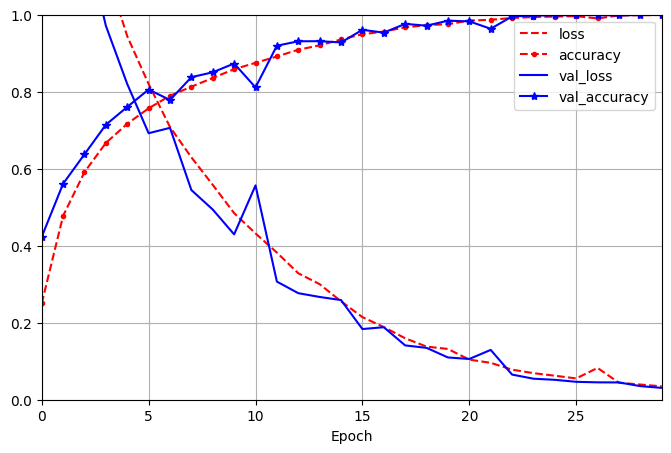

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                   xlim=[0, 29],
                                   ylim=[0, 1],
                                   grid=True,
                                   xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [27]:
ann_model.evaluate(sign_mnist_test_features, sign_mnist_test_labels)

225/225 [==============================] - 1s 3ms/step - loss: 1.1027 - accuracy: 0.7437


[1.102684497833252, 0.743725597858429]

The model has a score of about `0.765` on the testing data.
This is a vast improvement from the SGDClassifier, which had a score of about `0.611` on the same testing data.

In [28]:
ann_model.predict(sign_mnist_test_features[0:5]).argmax(axis=-1), sign_mnist_test_labels[0:5]

1/1 [==============================] - 0s 97ms/step


(array([ 0, 22,  4, 20,  0]),
       Letter
 2486       0
 3605      22
 4252       4
 2877      20
 4640       0)

The model correctly predicts these instances of the testing data.

### Second ANN
Create a new ANN using the sequential API to train a multiclass classifier model with different hyperparameters values (add more hidden layers, add more neurons in the layers, increase epoch number, change the loss function and the optimizer)
- Evaluate the new ANN using the test set to estimate the generalization. **Write your observations (compare the score of the new ANN and the previous ANN in question 7)**

In [29]:
import tensorflow as tf
tf.random.set_seed(42)
ann_model2 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[784]),
        tf.keras.layers.Dense(200, activation="relu"),
        tf.keras.layers.Dense(200, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(25, activation="softmax")
])

In [30]:
ann_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 25)                2525      
                                                                 
Total params: 219825 (858.69 KB)
Trainable params: 219825 (858.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
ann_model2.compile(loss="sparse_categorical_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

In [32]:
train_features, train_labels = split_into_features_labels(sign_mnist_train, label="Letter")
history = ann_model2.fit(train_features, train_labels,
                        epochs=30,
                        validation_data=split_into_features_labels(sign_mnist_validation, label="Letter"))

Epoch 1/30
733/733 [==============================] - 7s 8ms/step - loss: 7.1602 - accuracy: 0.3074 - val_loss: 1.7305 - val_accuracy: 0.4845
Epoch 2/30
733/733 [==============================] - 4s 6ms/step - loss: 1.3502 - accuracy: 0.5870 - val_loss: 1.0354 - val_accuracy: 0.6675
Epoch 3/30
733/733 [==============================] - 4s 6ms/step - loss: 0.9512 - accuracy: 0.6923 - val_loss: 0.7192 - val_accuracy: 0.7590
Epoch 4/30
733/733 [==============================] - 6s 8ms/step - loss: 0.8598 - accuracy: 0.7238 - val_loss: 0.4147 - val_accuracy: 0.8640
Epoch 5/30
733/733 [==============================] - 4s 6ms/step - loss: 0.5746 - accuracy: 0.8066 - val_loss: 0.2636 - val_accuracy: 0.9055
Epoch 6/30
733/733 [==============================] - 4s 6ms/step - loss: 0.5967 - accuracy: 0.8177 - val_loss: 0.4417 - val_accuracy: 0.8510
Epoch 7/30
733/733 [==============================] - 6s 8ms/step - loss: 0.4170 - accuracy: 0.8645 - val_loss: 0.2664 - val_accuracy: 0.9147
Epoch 

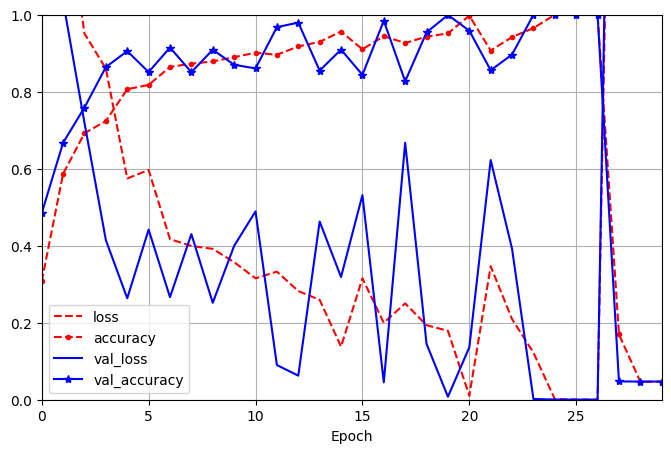

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5),
                                   xlim=[0, 29],
                                   ylim=[0, 1],
                                   grid=True,
                                   xlabel="Epoch",
                                   style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [34]:
ann_model2.evaluate(*split_into_features_labels(sign_mnist_test, label="Letter"))

225/225 [==============================] - 1s 2ms/step - loss: 3.2039 - accuracy: 0.0201


[3.2038538455963135, 0.020078081637620926]

This model performs slightly better from the previous neural network.
This one has a score of `0.822` while the previous one had a score of `0.765`.
The difference between this model and the previous is that we changed the optimizer to `adam` and added another hidden layer with 200 nodes.

In [35]:
X_new_features, X_new_labels = split_into_features_labels(sign_mnist_test, label="Letter")
X_new_features = X_new_features[5:9]
X_new_labels = X_new_labels[5:9]

ann_model2.predict(X_new_features).argmax(axis=-1), X_new_labels

1/1 [==============================] - 0s 69ms/step


(array([17, 17, 17, 17]),
       Letter
 2155       2
 1535      16
 1817      18
 3256       7)

The model correctly predicts these instances of the testing data.

## Part 2
In this part you’ll use the “Data for Admission in the University” dataset from assignment 2 and assignment 4 to implement a regression ANN.

### Setting Up The Data
Download the data and load it as a csv file.

In [36]:
from pathlib import Path
import pandas as pd
import urllib.request

# download the data if it is not downloaded
if not Path("adm_data.csv").is_file():
  # here I download the data from my personal git repo for this class instead of using Google Drive
  url = "https://raw.githubusercontent.com/RochX/comp486-assignments/main/assignment2/adm_data.csv"
  urllib.request.urlretrieve(url, "adm_data.csv")

In [37]:
adm_data=pd.read_csv('adm_data.csv')
adm_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


Split the data into train data (0.85) and test data (0.15).

In [38]:
from sklearn.model_selection import train_test_split
adm_train, adm_test = train_test_split(adm_data, test_size=0.15, random_state=42)
len(adm_train), len(adm_test)

(340, 60)

Hold out the last 50 instances from the training set for validation.

In [39]:
adm_validate = adm_train[-50:]
adm_train = adm_train[:-50]
len(adm_train), len(adm_validate)

(290, 50)

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def split_into_features_labels(df, *, label):
  features = df.drop(label, axis=1)
  labels = df[[label]]
  return features, labels

# split data into features and labels
adm_train_features, adm_train_labels = split_into_features_labels(adm_train, label="Chance of Admit ")
adm_validate_features, adm_validate_labels = split_into_features_labels(adm_validate, label="Chance of Admit ")
adm_test_features, adm_test_labels = split_into_features_labels(adm_test, label="Chance of Admit ")

# scale the features and labels
adm_feature_scaler = MinMaxScaler().set_output(transform="pandas")
adm_label_scaler = MinMaxScaler().set_output(transform="pandas")

# scale features
adm_train_features = adm_feature_scaler.fit_transform(adm_train_features)
adm_validate_features = adm_feature_scaler.transform(adm_validate_features)
adm_test_features = adm_feature_scaler.transform(adm_test_features)

# scale labels
adm_train_labels = adm_label_scaler.fit_transform(adm_train_labels)
adm_validate_labels = adm_label_scaler.fit_transform(adm_validate_labels)
adm_test_labels = adm_label_scaler.fit_transform(adm_test_labels)

### Creating ANN
Create ANN using the sequential API to train a regression model to predict the chance of
admission as follows:


Build the neural network with 3 dense hidden layers (100 neurons in each
hidden layer).

In [41]:
import tensorflow as tf
tf.random.set_seed(42)

adm_ann = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[8]),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)
])

Compile the neural network with `loss="mse"`, `optimizer=Adam`, `metrics=['mse']`

In [42]:
adm_ann.compile(loss="mse", optimizer="adam", metrics=['mse', 'R2Score'])

Train the neural network.

In [43]:
history = adm_ann.fit(adm_train_features, adm_train_labels,
                        epochs=30,
                        validation_data=(adm_validate_features, adm_validate_labels))

Epoch 1/30
10/10 [==============================] - 1s 33ms/step - loss: 0.0556 - mse: 0.0556 - r2_score: -0.1995 - val_loss: 0.0188 - val_mse: 0.0188 - val_r2_score: 0.6610
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.0174 - mse: 0.0174 - r2_score: 0.6247 - val_loss: 0.0207 - val_mse: 0.0207 - val_r2_score: 0.6277
Epoch 3/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - r2_score: 0.6998 - val_loss: 0.0093 - val_mse: 0.0093 - val_r2_score: 0.8322
Epoch 4/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0117 - mse: 0.0117 - r2_score: 0.7472 - val_loss: 0.0100 - val_mse: 0.0100 - val_r2_score: 0.8206
Epoch 5/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0101 - mse: 0.0101 - r2_score: 0.7813 - val_loss: 0.0071 - val_mse: 0.0071 - val_r2_score: 0.8711
Epoch 6/30
10/10 [==============================] - 0s 6ms/step - loss: 0.0098 - mse: 0.0098 - r2_score: 0.7875 - val_loss: 0.0073 - val_m

Evaluate the ANN using the test set to estimate the generalization.
**Write your observations (compare the result of ANN with the linear regression models in assignment 4 part 1)**

In [44]:
adm_ann.evaluate(adm_test_features, adm_test_labels)

2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - mse: 0.0122 - r2_score: 0.8352


[0.012193772941827774, 0.012193772941827774, 0.8352216482162476]

In assignment 4, we found that the `LinearRegression` model from scikit learn had a mean squared error of `0.0136`.
Here our ANN had a mean squared error of `0.0116`, so the ANN is an improvement from the linear regression.

Use the ANN to predict `X_new = XTest[2]` and `X_new = XTest[50]`.
Did the ANN classify all images correctly? Prove your answer.

In [45]:
adm_ann.predict(adm_test_features[0:5]), adm_test_labels[0:5]

1/1 [==============================] - 0s 70ms/step


(array([[0.50961345],
        [0.61053604],
        [0.97370017],
        [0.77587646],
        [0.3028309 ]], dtype=float32),
      Chance of Admit 
 209          0.548387
 280          0.548387
 33           0.903226
 210          0.725806
 93           0.161290)